# Decision Tree Classifier (basic version)

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../iris.csv")
dfSet = df[ df['variety'] == "Setosa" ]
dfVir = df[ df['variety'] == "Virginica"] 
dfVer = df[ df['variety'] == "Versicolor"]

In [3]:
features = ['sepal.length',
            'sepal.width']
labels   = 'variety'

In [4]:
x = df[features]
y = df[labels]

In [11]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(x, y)

[Text(0.5, 0.9, 'sepal.length <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2222222222222222, 0.7, 'sepal.width <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.1111111111111111, 0.5, 'sepal.length <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.16666666666666666, 0.3, 'sepal.length <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.3333333333333333, 0.5, 'sepal.length <= 5.35\ngini = 0.043\nsamples = 45\nvalue = [44, 1, 0]'),
 Text(0.2777777777777778, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.3888888888888889, 0.3, 'sepal.width <= 3.2\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text

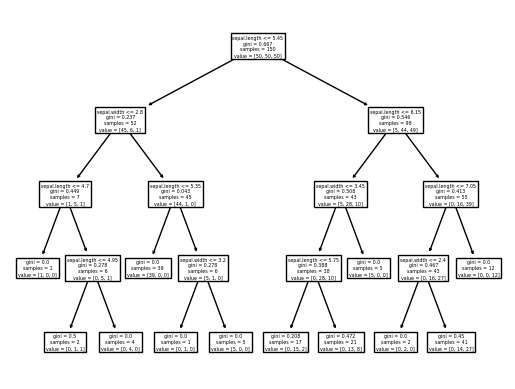

In [12]:
tree.plot_tree(dtree, feature_names=features)

# Overfitting


In [7]:
p = np.linspace(4.1, 8.2, 1000)
q = np.linspace(1.9, 4.6, 500)
pq = np.zeros((500000, 2))
for i in range(len(q)):
    for j in range(len(p)):
        pq[j + i*len(p)] = [p[j], q[i]]

In [8]:
out = dtree.predict(pd.DataFrame(pq))

c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
d = {'Setosa' : 0,
     'Virginica' : 1,
     'Versicolor' : 2}

a = np.reshape(pd.Series(out).map(d), (500,1000))

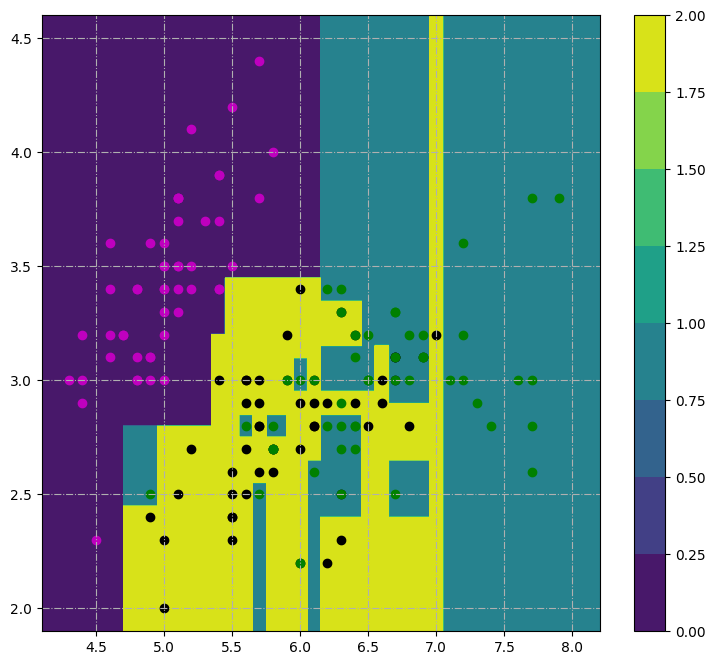

In [10]:
P, Q = np.meshgrid(p,q)

plt.figure(figsize=(9,8))
plt.grid(which='both', linestyle='dashdot')

plt.contourf(P, Q, a)
plt.colorbar()

plt.scatter(dfSet['sepal.length'], dfSet['sepal.width'], c='m')
plt.scatter(dfVer['sepal.length'], dfVer['sepal.width'], c='k')
plt.scatter(dfVir['sepal.length'], dfVir['sepal.width'], c='g')

plt.show()